<span style="font-size: 30px;">Import the Dataset and select some columns.</span>


In [2]:
import pandas as pd 
df=pd.read_csv("E:/Combined_Flights_2021.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311871 entries, 0 to 6311870
Data columns (total 61 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   FlightDate                               object 
 1   Airline                                  object 
 2   Origin                                   object 
 3   Dest                                     object 
 4   Cancelled                                bool   
 5   Diverted                                 bool   
 6   CRSDepTime                               int64  
 7   DepTime                                  float64
 8   DepDelayMinutes                          float64
 9   DepDelay                                 float64
 10  ArrTime                                  float64
 11  ArrDelayMinutes                          float64
 12  AirTime                                  float64
 13  CRSElapsedTime                           float64
 14  ActualElapsedTime 

<span style="font-size: 15px;">Based on the information about the dataset, I have observed a high degree of correlation among most of the columns, which could result in data redundancy. Therefore, I have decided to select a subset of representative columns for the project.</span>


In [3]:
#select some highly representative columns 
selected_columns=["Airline","Distance", "Operating_Airline", "TaxiOut","TaxiIn","Origin","Dest","Quarter","Month","DayOfWeek",
                "Marketing_Airline_Network","DepDelayMinutes"]
df=df[selected_columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311871 entries, 0 to 6311870
Data columns (total 12 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Airline                    object 
 1   Distance                   float64
 2   Operating_Airline          object 
 3   TaxiOut                    float64
 4   TaxiIn                     float64
 5   Origin                     object 
 6   Dest                       object 
 7   Quarter                    int64  
 8   Month                      int64  
 9   DayOfWeek                  int64  
 10  Marketing_Airline_Network  object 
 11  DepDelayMinutes            float64
dtypes: float64(4), int64(3), object(5)
memory usage: 577.9+ MB


In [5]:
#Change the datatype in columns 
df['DayOfWeek']=df['DayOfWeek'].astype('category')
df['Quarter']=df['Quarter'].astype('category')
df['Month']=df['Month'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311871 entries, 0 to 6311870
Data columns (total 12 columns):
 #   Column                     Dtype   
---  ------                     -----   
 0   Airline                    object  
 1   Distance                   float64 
 2   Operating_Airline          object  
 3   TaxiOut                    float64 
 4   TaxiIn                     float64 
 5   Origin                     object  
 6   Dest                       object  
 7   Quarter                    category
 8   Month                      category
 9   DayOfWeek                  category
 10  Marketing_Airline_Network  object  
 11  DepDelayMinutes            float64 
dtypes: category(3), float64(4), object(5)
memory usage: 451.5+ MB


<span style="font-size: 30px;">EDA.</span>


<span style="font-size: 15px;">Understand the distribution of depature delay minutes</span>

In [62]:
df_1 = df[(df['DepDelayMinutes'] > 0) & (df['DepDelayMinutes']< 100)]
df_1

,Airline,Distance,Operating_Airline,TaxiOut,TaxiIn,Origin,Dest,Quarter,Month,DayOfWeek,Marketing_Airline_Network,DepDelayMinutes,DelayCategory,Route,State
10,SkyWest Airlines Inc.,1225.0,OO,32.0,4.0,PHX,FAR,1,3,3,AA,2.0,Small delay,PHX to FAR,NaN
12,SkyWest Airlines Inc.,328.0,OO,33.0,6.0,PHX,ABQ,1,3,3,AA,8.0,Small delay,PHX to ABQ,NaN
36,SkyWest Airlines Inc.,227.0,OO,27.0,7.0,FSM,DFW,1,3,3,AA,22.0,Medium delay,FSM to DFW,NaN
37,SkyWest Airlines Inc.,853.0,OO,15.0,12.0,FLG,DFW,1,3,3,AA,9.0,Small delay,FLG to DFW,NaN
59,SkyWest Airlines Inc.,701.0,OO,28.0,3.0,DFW,ASE,1,3,3,AA,18.0,Medium delay,DFW to ASE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311858,Southwest Airlines Co.,616.0,WN,8.0,9.0,BNA,MCO,2,6,2,WN,2.0,Small delay,BNA to MCO,NaN
6311859,Southwest Airlines Co.,616.0,WN,7.0,7.0,BNA,MCO,2,6,2,WN,3.0,Small delay,BNA to MCO,NaN
6311865,Southwest Airlines Co.,395.0,WN,8.0,4.0,BNA,MDW,2,6,2,WN,23.0,Medium delay,BNA to MDW,NaN
6311866,Southwest Airlines Co.,395.0,WN,9.0,5.0,BNA,MDW,2,6,2,WN,6.0,Small delay,BNA to MDW,NaN


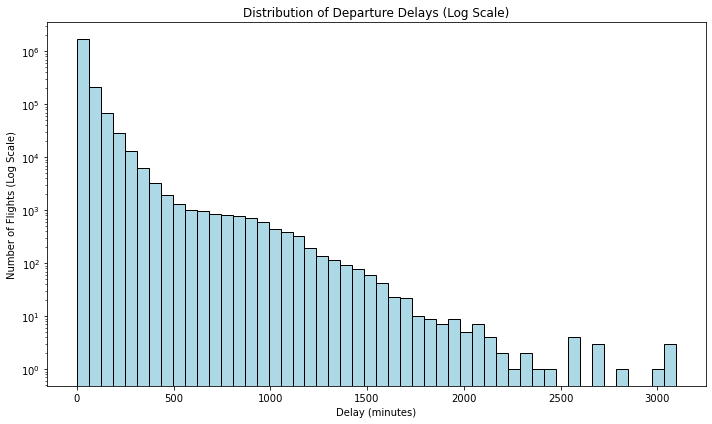

In [12]:
import numpy as np
import matplotlib.pyplot as plt

non_zero_delays = df[df['DepDelayMinutes'] > 0]['DepDelayMinutes']

plt.figure(figsize=(10,6))

# Plot histogram with log scale
plt.hist(non_zero_delays, bins=50, color='lightblue', edgecolor='black',log=True) #log=True, bins=non_zero_delays.nunique()
plt.title('Distribution of Departure Delays (Log Scale)')
plt.xlabel('Delay (minutes)')
plt.ylabel('Number of Flights (Log Scale)')
plt.tight_layout()
plt.show()

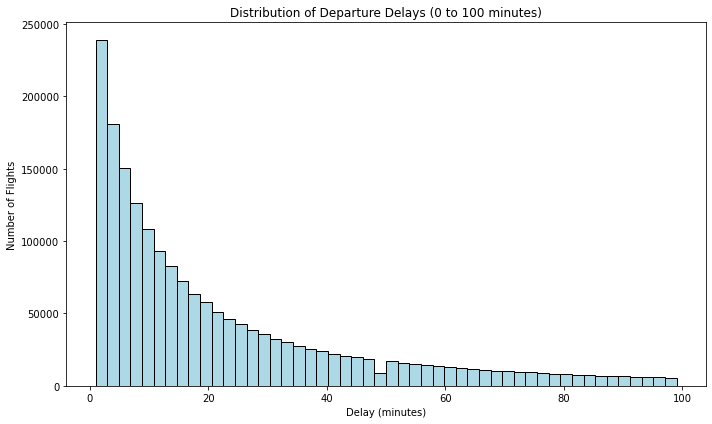

In [14]:
# Narrow down the range of DepDelayMinutes
limited_delays = df[(df['DepDelayMinutes'] > 0) & (df['DepDelayMinutes'] < 100)]['DepDelayMinutes']
plt.figure(figsize=(10,6))
plt.hist(limited_delays, bins=50, color='lightblue', edgecolor='black') #log=True
plt.title('Distribution of Departure Delays (0 to 100 minutes)')
plt.xlabel('Delay (minutes)')
plt.ylabel('Number of Flights')
plt.tight_layout()  
plt.savefig("high_res_histogram.png", dpi=300)
plt.show()

<span style="font-size: 30px;">Deal With the Missing Values in DepDelayMinutes and Classify this column</span>


In [20]:
null_counts = df['DepDelayMinutes'].isnull().sum()
print(null_counts)
print("The fraction of null values is:", null_counts/len(df))

108413
The fraction of null values is: 0.017176048116319235


In [22]:
import pandas as pd
def categorize_delay(x):
    if x ==0:
        return "On time"
    elif 0 < x <= 15:
        return "Small delay"
    elif 15 < x <= 45:
        return "Medium delay"
    elif x>45:
        return "Large delay"
df['DelayCategory'] = df['DepDelayMinutes'].apply(categorize_delay)
df['DelayCategory'] = df['DelayCategory'].fillna("Cancelled")   # Null values mean Cancelled in this dataset
df['DelayCategory'].value_counts()

On time         4147768
Small delay     1019416
Medium delay     563238
Large delay      473036
Cancelled        108413
Name: DelayCategory, dtype: int64

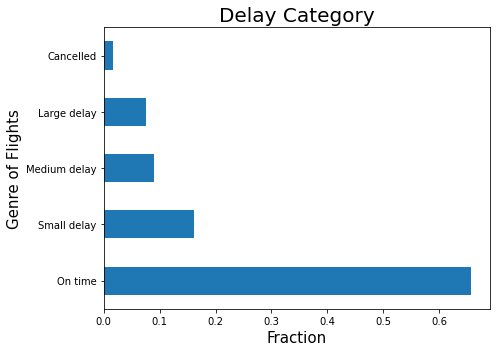

In [30]:
import matplotlib.pyplot as plt
correct_order=['On time','Small delay','Medium delay','Large delay','Cancelled']
plt.figure(figsize=(7,5))
pd.value_counts(df['DelayCategory'],normalize=True).reindex(correct_order).plot.barh() #normalize=True
plt.xlabel('Fraction',fontsize=15)
plt.ylabel('Genre of Flights',fontsize=15)
plt.title('Delay Category',fontsize=20)
plt.tight_layout()  
plt.show()

<span style="font-size: 30px;">Exploring The Features</span>

<span style="font-size: 15px;">Airline</span>

In [19]:
df["Airline"].value_counts()

Southwest Airlines Co.                       1064640
SkyWest Airlines Inc.                         753343
Delta Air Lines Inc.                          747998
American Airlines Inc.                        736399
United Air Lines Inc.                         446837
Republic Airlines                             332926
Endeavor Air Inc.                             266867
Envoy Air                                     255751
Comair Inc.                                   222602
JetBlue Airways                               202702
Spirit Air Lines                              191361
Alaska Airlines Inc.                          188955
Mesa Airlines Inc.                            159789
Frontier Airlines Inc.                        137142
Allegiant Air                                 115881
Horizon Air                                   111628
Capital Cargo International                    99331
Air Wisconsin Airlines Corp                    80256
Commutair Aka Champlain Enterprises, Inc.     

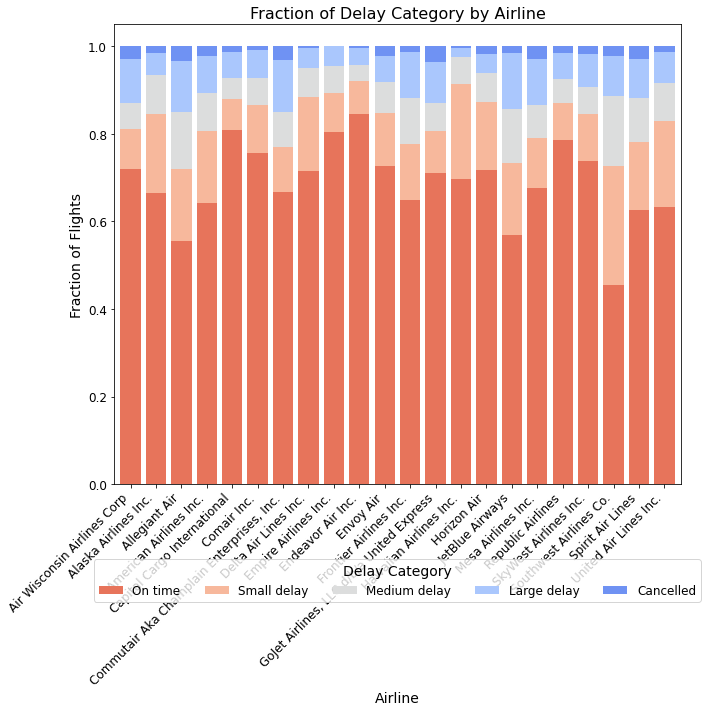

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
category_order = ['On time', 'Small delay', 'Medium delay', 'Large delay', 'Cancelled']
df_grouped = df.groupby(['Airline', 'DelayCategory']).size().unstack().fillna(0)
df_grouped = df_grouped[category_order]
df_grouped = df_grouped.div(df_grouped.sum(axis=1), axis=0)
palette = sns.color_palette("coolwarm_r", len(category_order))
plt.figure(figsize=(10,10))
df_grouped.plot(kind='bar', stacked=True, ax=plt.gca(), color=palette, width=0.8)
plt.title('Fraction of Delay Category by Airline', fontsize=16)
plt.ylabel('Fraction of Flights', fontsize=14)
plt.xlabel('Airline', fontsize=14)
plt.legend(title="Delay Category", fontsize=12, title_fontsize='14', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.xticks(rotation=45, ha='right', fontsize=12) 
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [32]:
len(df['Airline'].unique())

22

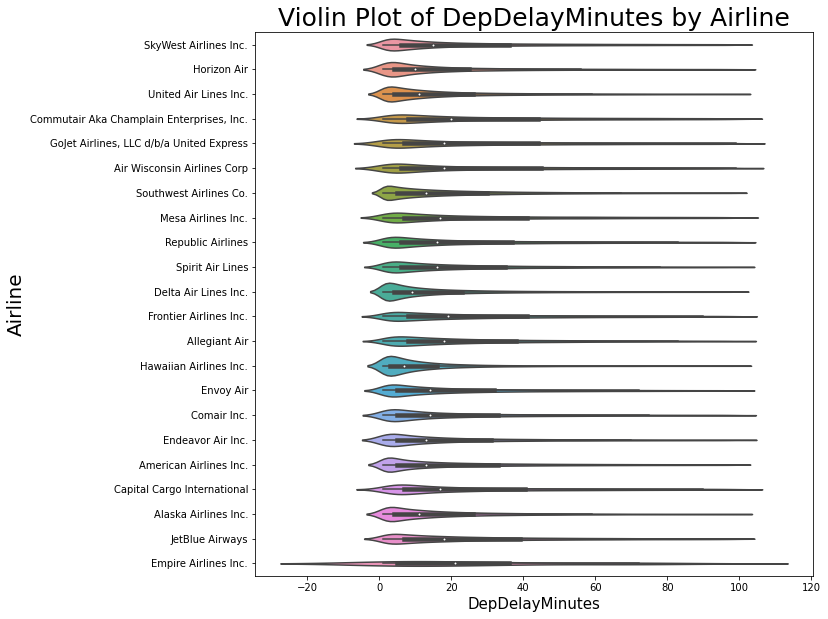

In [63]:
import seaborn as sns
col = ['Airline', 'DepDelayMinutes']
non_na = df_1[col].dropna(subset=['DepDelayMinutes'])
plt.figure(figsize=(10,10))  # Adjust the figure size
sns.violinplot(data=non_na, x='DepDelayMinutes', y='Airline')
plt.ylabel('Airline',fontsize=20)
plt.xlabel('DepDelayMinutes',fontsize=15)
plt.title('Violin Plot of DepDelayMinutes by Airline',fontsize=25)
plt.show()

<span style="font-size: 15px;">Month/Quarter/DayOfWeek</span>

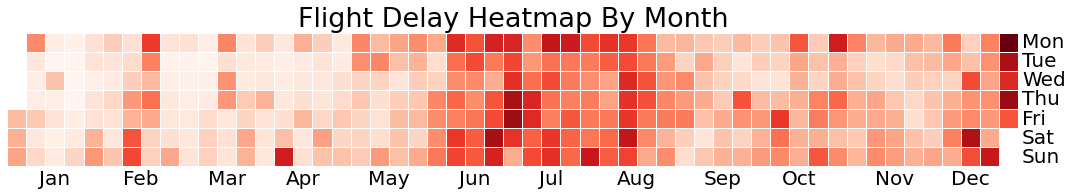

In [39]:
import calmap
import pandas as pd
import matplotlib.pyplot as plt
daily_avg_delay = df.groupby('FlightDate')['DepDelayMinutes'].mean()
fig, ax = plt.subplots(figsize=(15, 12))  # Adjusted for 16:9 aspect ratio
calmap.yearplot(daily_avg_delay, year=2021, ax=ax)
ax.set_title('Flight Delay Heatmap By Month', fontsize=27)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.tight_layout()
plt.show()


<span style="font-size: 20px;">Origin/Dest </span>

In [46]:
df['Route'] = df['Origin'].astype(str) + ' to ' + df['Dest'].astype(str)

LAX to SFO    9602
SFO to LAX    9587
LAX to LAS    8725
LAS to LAX    8711
HNL to OGG    8246
              ... 
SFO to GRB       1
CMH to EUG       1
EUG to CMH       1
GRB to SFO       1
SFB to PIE       1
Name: Route, Length: 7055, dtype: int64

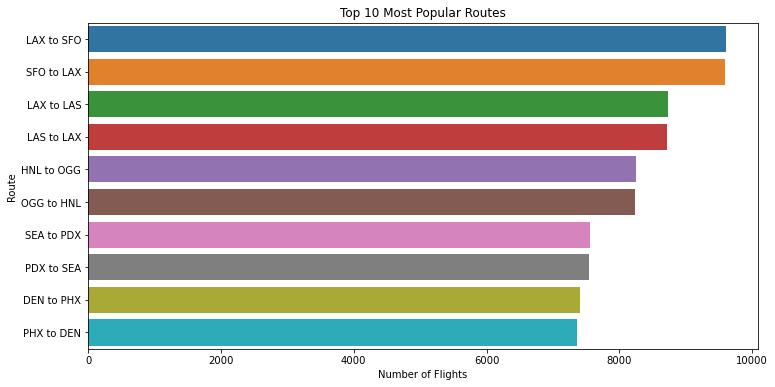

In [47]:
#The TOP10 popular routes 
df['Route'] = df['Origin'].astype(str) + ' to ' + df['Dest'].astype(str)
popular_routes = df['Route'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y=popular_routes.index, x=popular_routes.values)
plt.title('Top 10 Most Popular Routes')
plt.xlabel('Number of Flights')
plt.ylabel('Route')
plt.show()

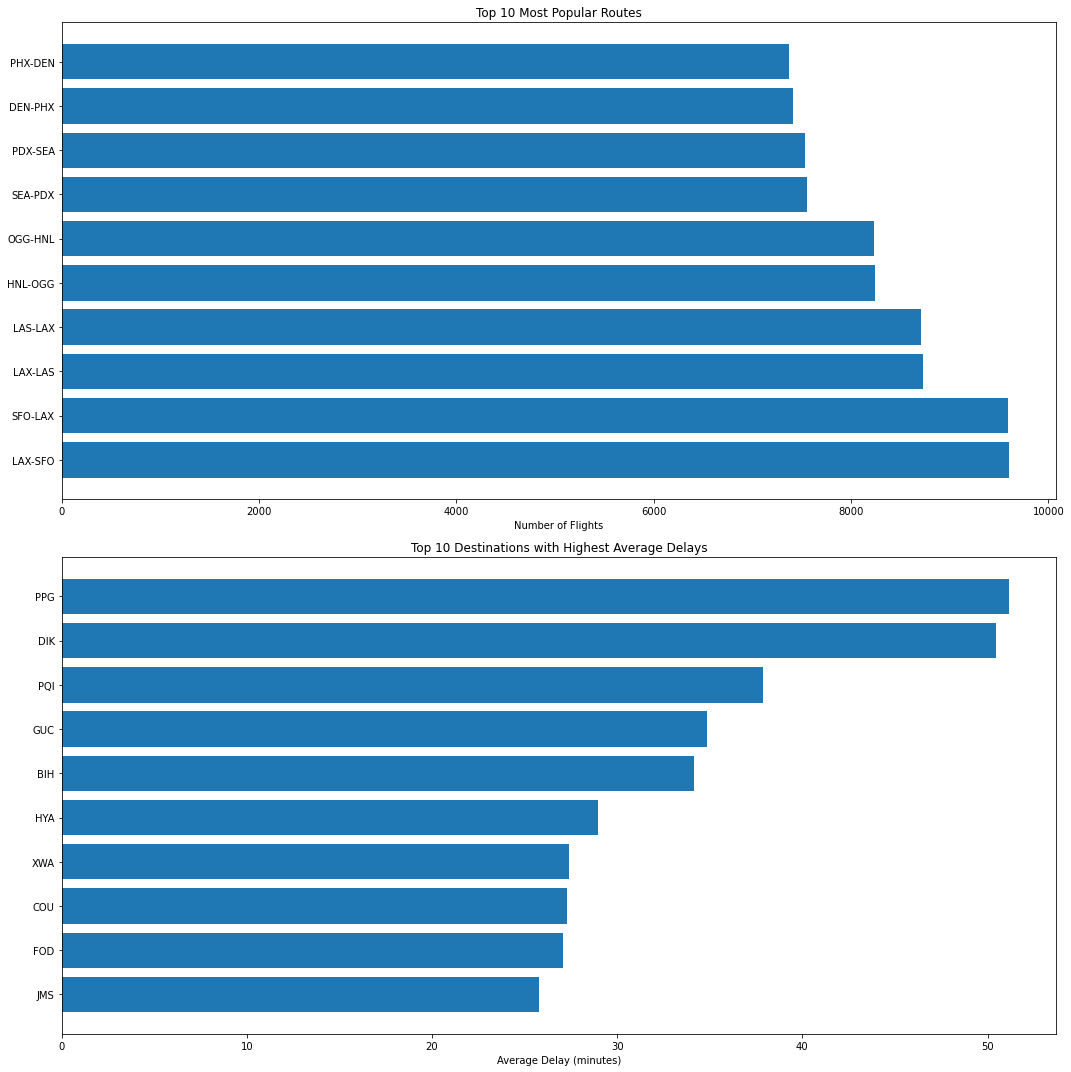

In [49]:
popular_routes = df.groupby(['Origin', 'Dest']).size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(10)
popular_routes['Origin'] = popular_routes['Origin'].astype(str)
popular_routes['Dest'] = popular_routes['Dest'].astype(str)
dest_delays = df.groupby('Dest')['DepDelayMinutes'].mean().sort_values(ascending=False).head(10)
df['State'] = df['Dest'].str.split('_').str[1]
fig, axes = plt.subplots(2, 1, figsize=(15, 15))
axes[0].barh(popular_routes['Origin'] + '-' + popular_routes['Dest'], popular_routes['Count'])
axes[0].set_title('Top 10 Most Popular Routes')
axes[0].set_xlabel('Number of Flights')
axes[1].barh(dest_delays.index, dest_delays.values)
axes[1].set_title('Top 10 Destinations with Highest Average Delays')
axes[1].set_xlabel('Average Delay (minutes)')
axes[1].invert_yaxis()
plt.tight_layout()
plt.show()

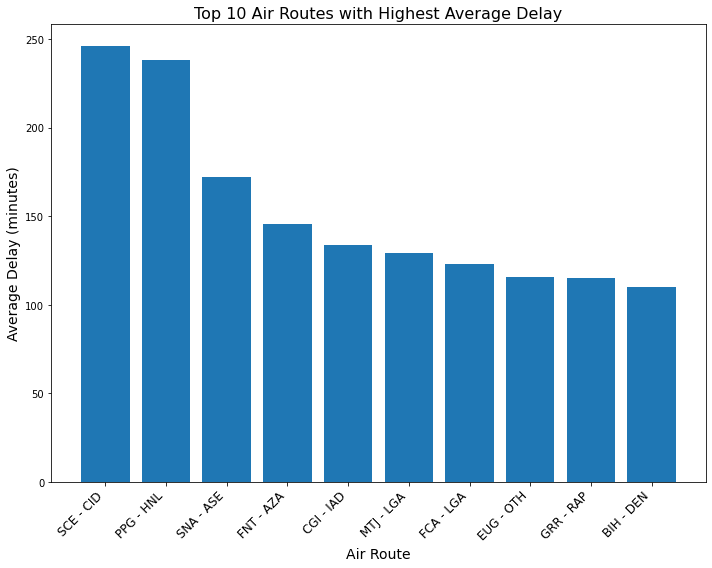

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
grouped = df.groupby(['Origin', 'Dest'])['DepDelayMinutes'].mean().reset_index()
sorted_routes = grouped.sort_values(by='DepDelayMinutes', ascending=False)
top_routes = sorted_routes.head(10)
plt.figure(figsize=(10, 8))
plt.bar(top_routes['Origin'] + ' - ' + top_routes['Dest'], top_routes['DepDelayMinutes'])
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Average Delay (minutes)', fontsize=14)
plt.xlabel('Air Route', fontsize=14)
plt.title('Top 10 Air Routes with Highest Average Delay', fontsize=16)
plt.tight_layout()
plt.show()

<span style="font-size: 20px;">Distance</span>

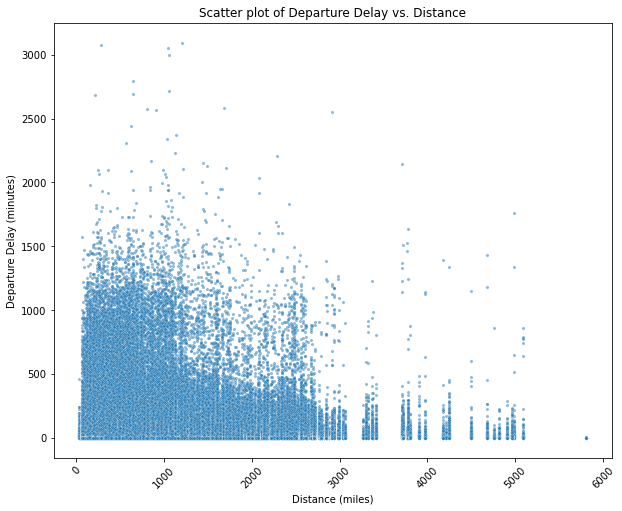

In [48]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Distance', y='DepDelayMinutes', data=df, alpha=0.5, s=10)
plt.title('Scatter plot of Departure Delay vs. Distance')
plt.xlabel('Distance (miles)')
plt.ylabel('Departure Delay (minutes)')
plt.xticks(rotation=45)
plt.show()

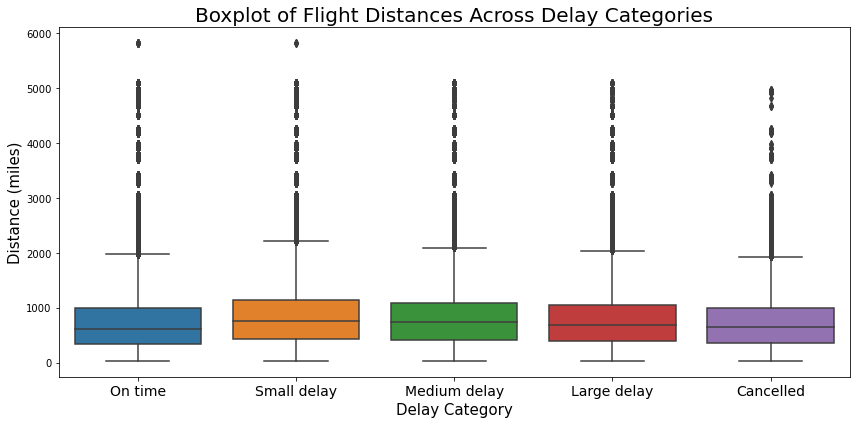

In [51]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='DelayCategory', y='Distance', data=df)
plt.title('Boxplot of Flight Distances Across Delay Categories', fontsize=20)
plt.xticks(fontsize=14)
plt.xlabel('Delay Category',fontsize = 15)
plt.ylabel('Distance (miles)', fontsize = 15)
plt.tight_layout()
plt.show()

<span style="font-size: 20px;">Operating_Airline </span>

In [52]:
df['Operating_Airline'].nunique()

22

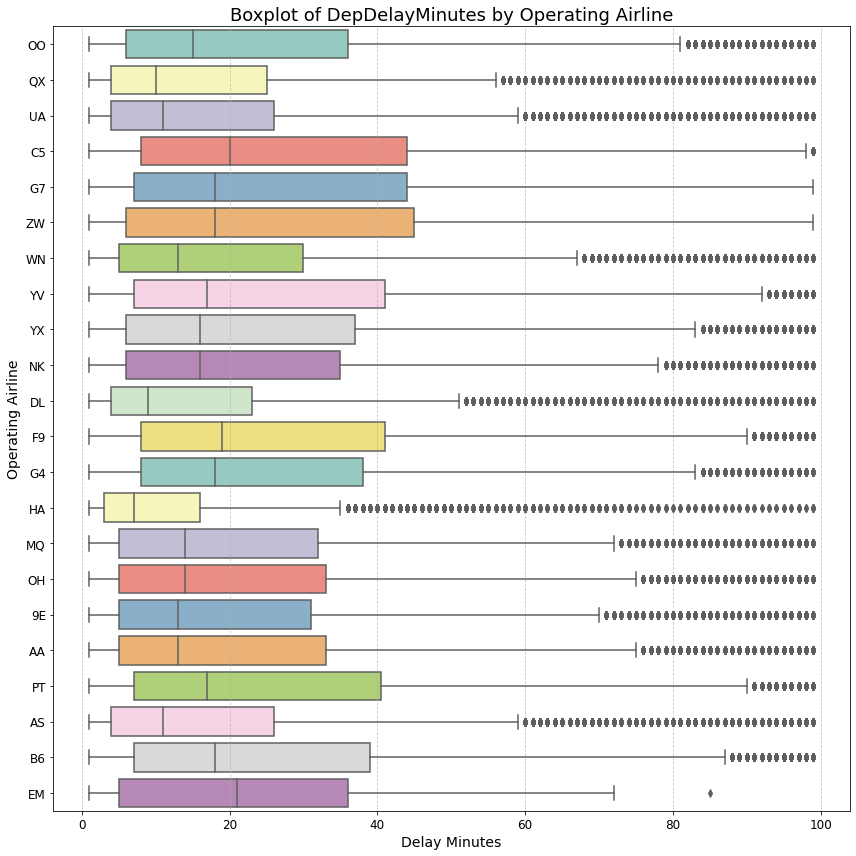

In [68]:
palette = 'Set3'  
plt.figure(figsize=(12,12))
sns.boxplot(x='DepDelayMinutes', y='Operating_Airline', data=df_1, palette=palette)
plt.title('Boxplot of DepDelayMinutes by Operating Airline', fontsize=18)
plt.xlabel('Delay Minutes', fontsize=14)
plt.ylabel('Operating Airline', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() 

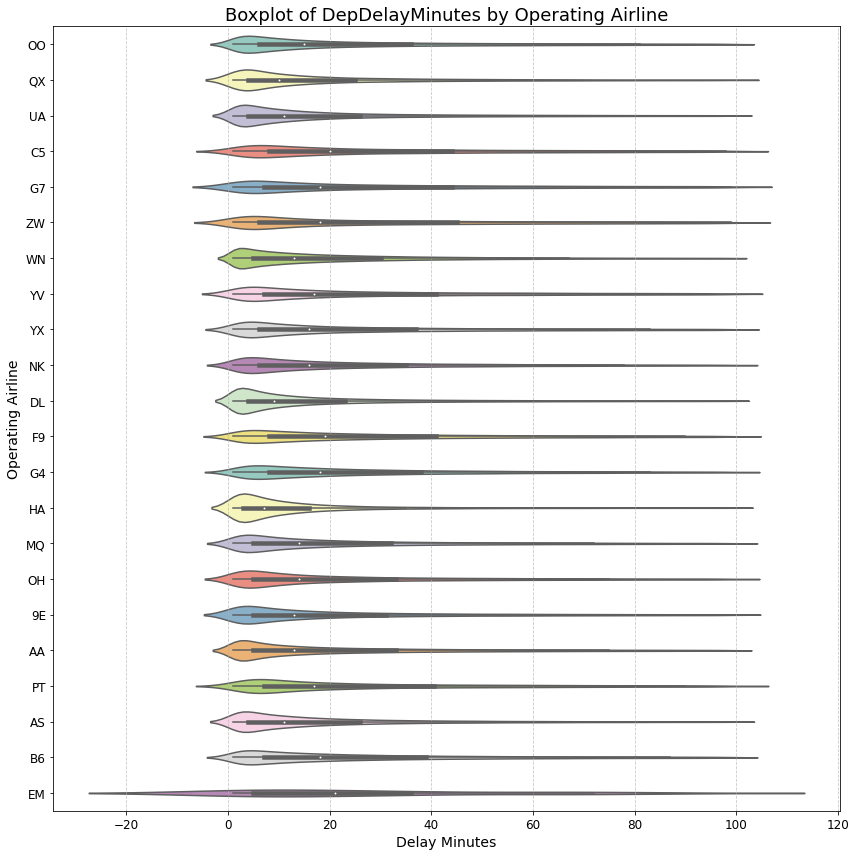

In [66]:
palette = 'Set3'  
plt.figure(figsize=(12,12))
sns.violinplot(x='DepDelayMinutes', y='Operating_Airline', data=df_1, palette=palette)
plt.title('Boxplot of DepDelayMinutes by Operating Airline', fontsize=18)
plt.xlabel('Delay Minutes', fontsize=14)
plt.ylabel('Operating Airline', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<span style="font-size: 20px;">Marketing_Airline_Network  </span>

In [71]:
df_1['Marketing_Airline_Network'].unique()

array(['AA', 'DL', 'UA', 'AS', 'WN', 'NK', 'F9', 'G4', 'HA', 'B6'],
      dtype=object)

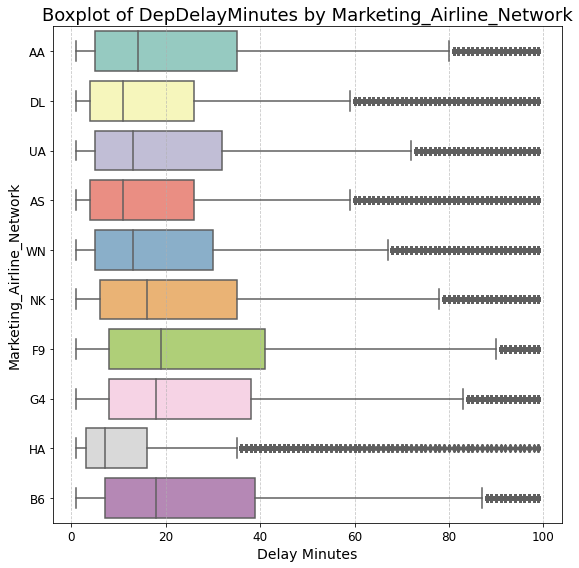

In [77]:
palette = 'Set3'  
plt.figure(figsize=(8,8))
sns.boxplot(x='DepDelayMinutes', y='Marketing_Airline_Network', data=df_1, palette=palette)
plt.title('Boxplot of DepDelayMinutes by Marketing_Airline_Network', fontsize=18)
plt.xlabel('Delay Minutes', fontsize=14)
plt.ylabel('Marketing_Airline_Network', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() 

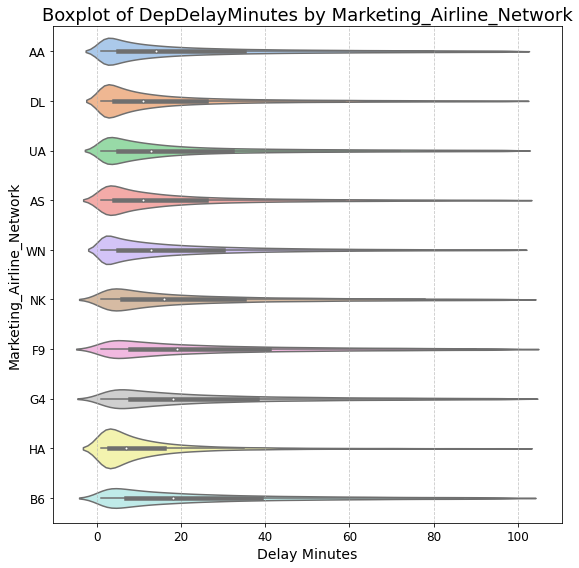

In [76]:
palette = 'pastel'  
plt.figure(figsize=(8,8))
sns.violinplot(x='DepDelayMinutes', y='Marketing_Airline_Network', data=df_1, palette=palette)
plt.title('Boxplot of DepDelayMinutes by Marketing_Airline_Network', fontsize=18)
plt.xlabel('Delay Minutes', fontsize=14)
plt.ylabel('Marketing_Airline_Network', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() 

Taxiin/TaxiOut

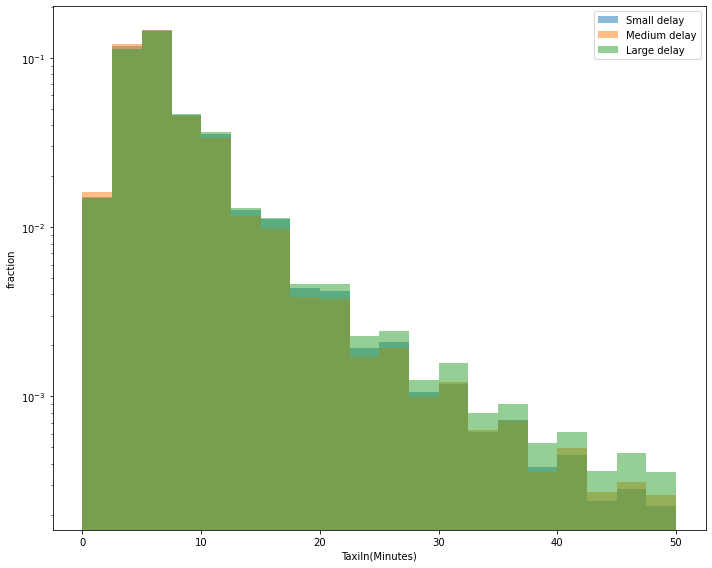

In [88]:
categories= df_1['DelayCategory'].unique()
bin_range = (0,50)
plt.figure(figsize=(10,8))
for c in df_1['DelayCategory'].unique():
    plt.hist(df_1[df_1['DelayCategory'] == c]['TaxiIn'], alpha=0.5, label=c, range=bin_range, bins=20, density=True,log=True)

plt.legend()
plt.xlabel('TaxiIn(Minutes)')
plt.ylabel('fraction')
plt.tight_layout()
plt.show()

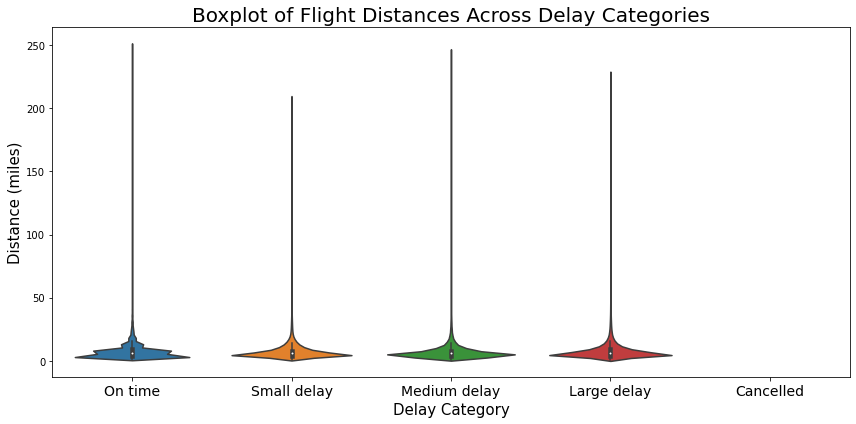

In [93]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='DelayCategory', y='TaxiIn', data=df)
plt.title('Boxplot of Flight Distances Across Delay Categories', fontsize=20)
plt.xticks(fontsize=14)
plt.xlabel('Delay Category',fontsize = 15)
plt.ylabel('Distance (miles)', fontsize = 15)
plt.tight_layout()
plt.show()

<span style="font-size: 30px;">Splitting Strategy:StratifiedKFold</span>


<span style="font-size: 15px;">This dataset is non-iid, since only a small fraction of the points are in one of the classes
Thus, we shall use stratifiedKfold to split such data.  </span>

In [94]:
from sklearn.model_selection import train_test_split
df=pd.read_csv("E:/Combined_Flights_2021.csv")

selected_column=["Airline","Distance", "Operating_Airline", "TaxiOut","TaxiIn","Origin","Dest","Quarter","Month","DayOfWeek",
                "Marketing_Airline_Network",
                 "DepDelayMinutes"]
df=df[selected_column]
df

,Airline,Distance,Operating_Airline,TaxiOut,TaxiIn,Origin,Dest,Quarter,Month,DayOfWeek,Marketing_Airline_Network,DepDelayMinutes
0,SkyWest Airlines Inc.,262.0,OO,10.0,5.0,SGU,PHX,1,3,3,AA,0.0
1,SkyWest Airlines Inc.,262.0,OO,23.0,3.0,PHX,SGU,1,3,3,AA,0.0
2,SkyWest Airlines Inc.,843.0,OO,15.0,16.0,MHT,ORD,1,3,3,AA,0.0
3,SkyWest Airlines Inc.,868.0,OO,27.0,7.0,DFW,TRI,1,3,3,AA,0.0
4,SkyWest Airlines Inc.,425.0,OO,13.0,3.0,PHX,BFL,1,3,3,AA,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6311866,Southwest Airlines Co.,395.0,WN,9.0,5.0,BNA,MDW,2,6,2,WN,6.0
6311867,Southwest Airlines Co.,395.0,WN,13.0,3.0,BNA,MDW,2,6,2,WN,0.0
6311868,Southwest Airlines Co.,806.0,WN,14.0,5.0,BNA,MIA,2,6,2,WN,0.0
6311869,Southwest Airlines Co.,806.0,WN,8.0,5.0,BNA,MIA,2,6,2,WN,0.0


In [95]:
import pandas as pd
def categorize_delay(x):
    if x ==0:
        return "On time"
    elif 0 < x <= 15:
        return "Small delay"
    elif 15 < x <= 45:
        return "Medium delay"
    elif x>45:
        return "Large delay"

df['DelayCategory'] = df['DepDelayMinutes'].apply(categorize_delay)
df['DelayCategory'] = df['DelayCategory'].fillna("Cancelled")   # Null values mean Cancelled in this dataset

In [105]:
y=df["DelayCategory"]
columns=["Airline","Distance", "Operating_Airline", "TaxiOut","TaxiIn","Origin","Dest","Quarter","Month","DayOfWeek",
                "Marketing_Airline_Network"]
X=df[columns]

from sklearn.model_selection import StratifiedKFold, train_test_split
random_state=18 

X_other,X_test,y_other,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=random_state)
print('test balance:',np.unique(y_test,return_counts=True))


#Do stratifiedKFold on X_other and y_other
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=random_state)

for train_index, val_index in skf.split(X_other,y_other):
    print("New Fold")
    X_train=X_other.iloc[train_index]
    y_train=y_other.iloc[train_index]
    X_val=X_other.iloc[val_index]
    y_val=y_other.iloc[val_index]
    print(np.unique(y_train,return_counts=True))
    print(np.unique(y_val,return_counts=True))

<span style="font-size: 30px;">Preprocessing</span>



Luckily, there are no missing values in my dataset, so I only need to do some encoding. 

Categorical Features: OnehotEncoder

In [114]:
from sklearn.preprocessing import OneHotEncoder
onehot_ftrs=["Airline", "Operating_Airline","Origin","Dest","Quarter","Month","DayOfWeek",
            "Marketing_Airline_Network"]
enc = OneHotEncoder(sparse_output=True)
enc.fit(X_train[onehot_ftrs])
print('feature names:', enc.get_feature_names_out(onehot_ftrs))
X_train_ohe=enc.transform(X_train[onehot_ftrs])
print('X_train_transformed')
print(X_train_ohe)
X_test_ohe=enc.fit_transform(X_test[onehot_ftrs])

feature names: ['Airline_Air Wisconsin Airlines Corp' 'Airline_Alaska Airlines Inc.'
 'Airline_Allegiant Air' 'Airline_American Airlines Inc.'
 'Airline_Capital Cargo International' 'Airline_Comair Inc.'
 'Airline_Commutair Aka Champlain Enterprises, Inc.'
 'Airline_Delta Air Lines Inc.' 'Airline_Empire Airlines Inc.'
 'Airline_Endeavor Air Inc.' 'Airline_Envoy Air'
 'Airline_Frontier Airlines Inc.'
 'Airline_GoJet Airlines, LLC d/b/a United Express'
 'Airline_Hawaiian Airlines Inc.' 'Airline_Horizon Air'
 'Airline_JetBlue Airways' 'Airline_Mesa Airlines Inc.'
 'Airline_Republic Airlines' 'Airline_SkyWest Airlines Inc.'
 'Airline_Southwest Airlines Co.' 'Airline_Spirit Air Lines'
 'Airline_United Air Lines Inc.' 'Operating_Airline_9E'
 'Operating_Airline_AA' 'Operating_Airline_AS' 'Operating_Airline_B6'
 'Operating_Airline_C5' 'Operating_Airline_DL' 'Operating_Airline_EM'
 'Operating_Airline_F9' 'Operating_Airline_G4' 'Operating_Airline_G7'
 'Operating_Airline_HA' 'Operating_Airline_MQ

Continuous Variable

In [117]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
str_ftrs=["Distance","TaxiIn","TaxiOut"]
X_train_sc = sc.fit_transform(X_train[str_ftrs])

Pipeline 

In [122]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
onehot_ftrs = ["Airline", "Operating_Airline", "Origin", "Dest", "Quarter", "Month", "DayOfWeek", "Marketing_Airline_Network"]
str_ftrs = ["Distance", "TaxiIn", "TaxiOut"]

enc = OneHotEncoder(sparse_output=True)
sc = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('enc', enc, onehot_ftrs),
        ('sc', sc, str_ftrs)
    ])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)


(4039597, 11)
(4039597, 840)
